## Imports

In [1]:
import numpy as np
from tqdm import tqdm
import math
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import deque

## Given variables


In [2]:
N = 20
a = 0.5
img = cv2.imread("Binaryzacja/tekstReczny.png", 0)
hist,bins = np.histogram(img.ravel(),256,[0,256])


## Plot img and his histogram

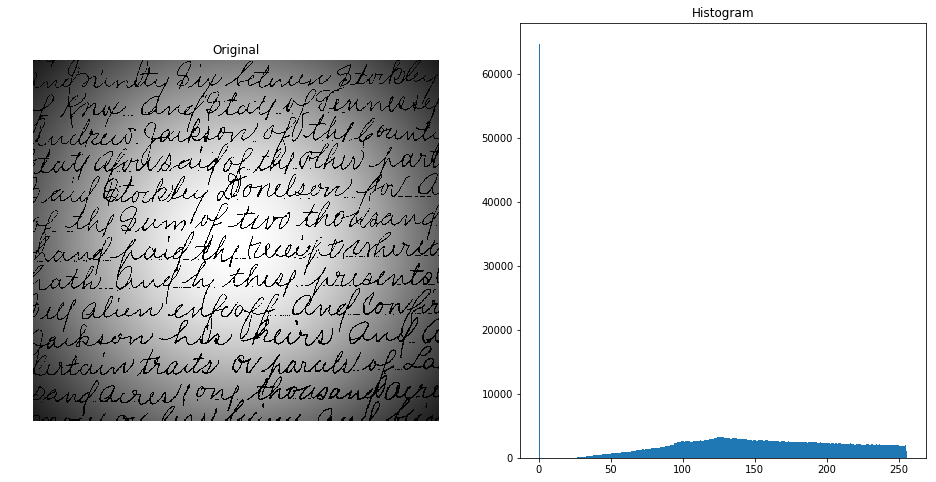

In [3]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(1,2,2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Histogram")
plt.show()

## Binarization manual and Otsu method

In [5]:
threshold = 50
binary_img = np.copy(img)
X, Y = binary_img.shape
ret, th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

for i in tqdm(range(X)):
    for j in range(Y):
        if img[i, j] > threshold:
            binary_img[i, j] = 255
        else:
            binary_img[i, j] = 0            

100%|██████████| 686/686 [00:00<00:00, 881.87it/s]


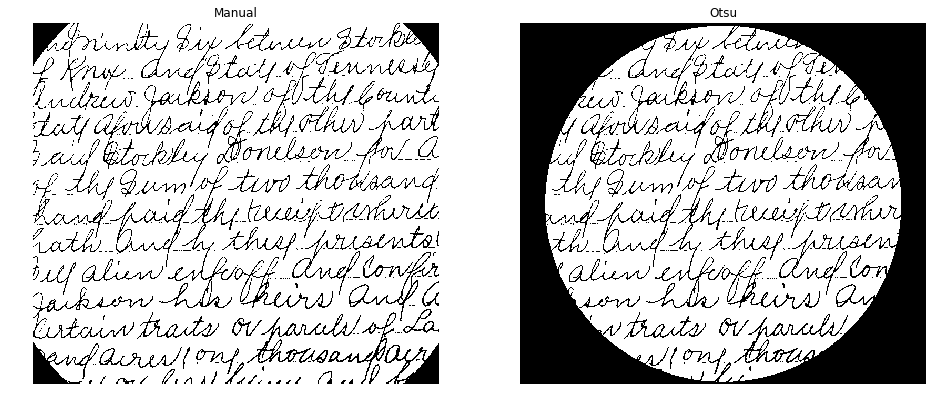

In [6]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(binary_img, cmap="gray")
plt.axis("off")
plt.title("Manual")
plt.subplot(1,2,2)
plt.imshow(th, cmap="gray")
plt.title("Otsu")
plt.axis("off")
plt.show()

## Binarization with moving mean

In [17]:
binary_moving_mean_img = np.copy(img)
queue = deque(np.zeros(N))


for i in tqdm(range(X)):
    for j in range(Y):
        z = img[i, j]
        queue.popleft()
        queue.append(z)
        m = np.mean(queue)
        T = a * m
        if z > T:
            binary_moving_mean_img[i, j] = 255
        else:
            binary_moving_mean_img[i, j] = 0






  0%|          | 0/686 [00:00<?, ?it/s]


  1%|          | 7/686 [00:00<00:10, 67.72it/s]


  2%|▏         | 14/686 [00:00<00:09, 68.08it/s]


  3%|▎         | 21/686 [00:00<00:09, 67.13it/s]


  4%|▍         | 28/686 [00:00<00:09, 67.50it/s]


  5%|▌         | 36/686 [00:00<00:09, 68.64it/s]


  6%|▋         | 43/686 [00:00<00:09, 68.31it/s]


  7%|▋         | 51/686 [00:00<00:09, 69.68it/s]


  9%|▊         | 59/686 [00:00<00:08, 70.55it/s]


 10%|▉         | 66/686 [00:00<00:08, 68.98it/s]


 11%|█         | 73/686 [00:01<00:08, 68.16it/s]


 12%|█▏        | 80/686 [00:01<00:08, 68.21it/s]


 13%|█▎        | 88/686 [00:01<00:08, 69.17it/s]


 14%|█▍        | 96/686 [00:01<00:08, 69.15it/s]


 15%|█▌        | 104/686 [00:01<00:08, 70.16it/s]


 16%|█▋        | 112/686 [00:01<00:08, 70.86it/s]


 17%|█▋        | 120/686 [00:01<00:08, 70.51it/s]


 19%|█▊        | 128/686 [00:01<00:07, 70.06it/s]


 20%|█▉        | 135/686 [00:01<00:07, 69.97it/s]


 21%|██        | 142/686 [00:02<0

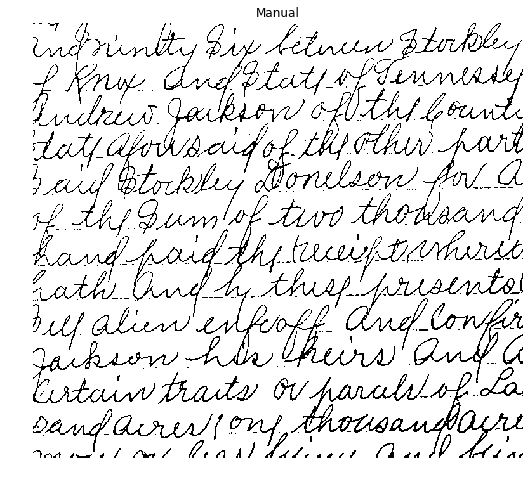

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
plt.imshow(binary_moving_mean_img, cmap="gray")
plt.axis("off")
plt.title("Manual")
plt.show()